In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df. describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df1=df.dropna()

In [8]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
 cdf=df1.copy()

In [10]:
cdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
def change_into_datetime(a):
 df1[a]=pd.to_datetime(cdf[a])

In [12]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

C:\Users\00423S744\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\00423S744\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\00423S744\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\00423S744\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide 

In [13]:
df1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
df1['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [15]:
df1['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [16]:
 # both are from same year. so remove the year from the date

In [17]:
df1['Journey_day']=df1['Date_of_Journey'].dt.day

C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\242913884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Journey_day']=df1['Date_of_Journey'].dt.day


In [18]:
df1['Journey_month']=df1['Date_of_Journey'].dt.month

C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\894571826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Journey_month']=df1['Date_of_Journey'].dt.month


In [19]:
df1.drop(['Date_of_Journey'],axis=1,inplace=True)

C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3938402553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Date_of_Journey'],axis=1,inplace=True)


In [20]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-18 05:50:00,2022-09-18 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-18 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-18 18:05:00,2022-09-18 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-18 16:50:00,2022-09-18 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [21]:
def extract_hour_min(df11,a):
    df11[a+'_hour']=df1[a].dt.hour
    df11[a+'_minute']=df1[a].dt.minute
    df11.drop([a],axis=1,inplace=True)
    return df1.head(2)

In [22]:
extract_hour_min(df1,'Arrival_Time')

C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3724312478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11[a+'_hour']=df1[a].dt.hour
C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3724312478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11[a+'_minute']=df1[a].dt.minute
C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3724312478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-18 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-18 05:50:00,7h 25m,2 stops,No info,7662,5,1,13,15


In [23]:
extract_hour_min(df1,'Dep_Time')

C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3724312478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11[a+'_hour']=df1[a].dt.hour
C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3724312478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11[a+'_minute']=df1[a].dt.minute
C:\Users\00423S744\AppData\Local\Temp\ipykernel_13460\3724312478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50


In [24]:
def group_time(x):
    if (x < 4) and (x >0):
     return 'Late Night'
    elif (x < 8) and (x >4):
     return 'Early Morning'
    elif (x < 12) and (x >8):
     return 'Morning'
    elif (x < 16) and (x >12):
     return 'Noon'
    elif (x < 20) and (x >16):
     return 'Evening'
    else :
     return 'Night'

<AxesSubplot:>

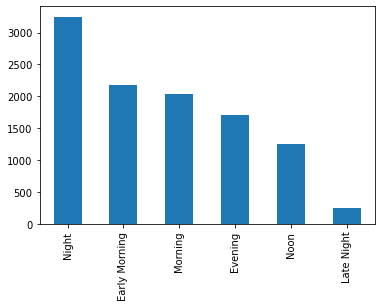

In [25]:
# applyinh a funciton to a column

df1['Dep_Time_hour'].apply(group_time).value_counts().plot(kind='bar')

In [26]:
! pip install cufflinks

In [27]:
! pip install chart_studio

In [28]:
# creating interactive plot(iplot)
import plotly
import cufflinks as cf


In [29]:
from cufflinks.offline import go_offline
from plotly.offline import iplot,plot,download_plotlyjs,init_notebook_mode


In [30]:
cf.go_offline()

In [31]:
# creating interactive plot using iplot
df1['Dep_Time_hour'].apply(group_time).value_counts().iplot(kind='bar')

In [32]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [33]:
def preprocess_duration(x):
    if 'h' not in x :
        x='0h '+ x
    elif 'm' not in x :
        x= x+' 0m'
    return x

In [34]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [35]:
df1['Duration']=df1['Duration'].apply(preprocess_duration)

In [36]:
df1.head(20)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,11,25,9,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,10,25,18,55
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,5,5,8,0
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,10,25,8,55
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,19,15,11,25


In [37]:
int(df1['Duration'][0].split(' ')[0][0:-1])

2

In [38]:
df1['Duration_hr']=df1['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [39]:
df1['Duration_min']=df1['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [40]:
df1['Duration_totmin']=df1['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [41]:
df1[['Duration_totmin','Price']].corr()

,Duration_totmin,Price
Duration_totmin,1.00000,0.50648
Price,0.50648,1.00000


In [1]:
list(range(10,1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]

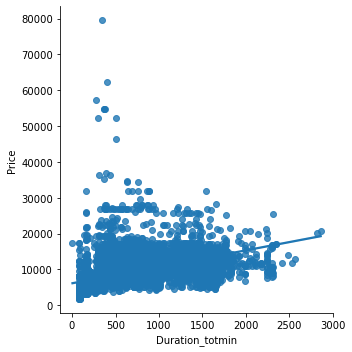

In [42]:
sns.lmplot(x='Duration_totmin',y='Price',data=df1)

<AxesSubplot:>

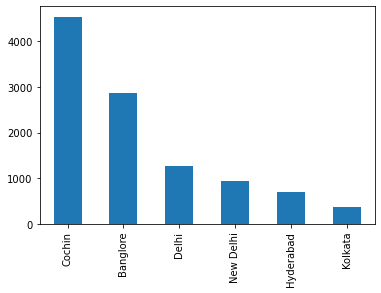

In [43]:
df1['Destination'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Destination'>

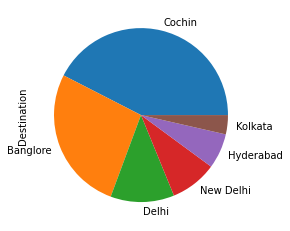

In [44]:
df1['Destination'].value_counts().plot(kind='pie')

In [45]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [46]:
df1[df1['Airline']=="Jet Airways"].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

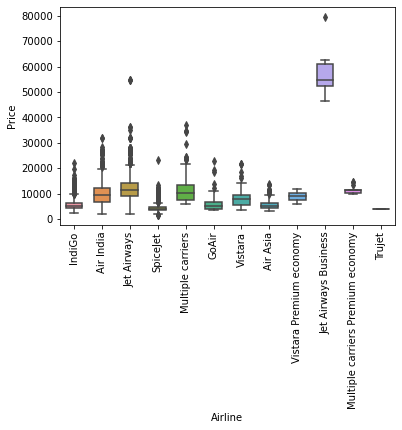

In [47]:
sns.boxplot(x='Airline',y='Price',data=df1,width=0.6)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

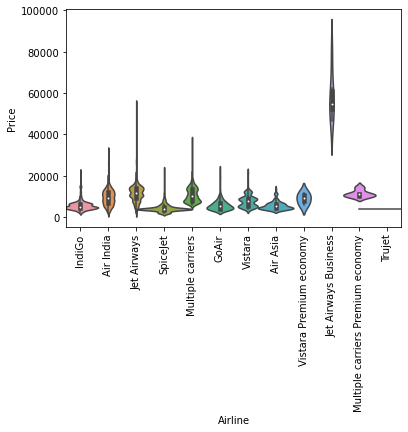

In [48]:
sns.violinplot(x='Airline',y='Price',data=df1,width=2)
plt.xticks(rotation='vertical')

In [49]:
np.round(df1['Additional_Info'].value_counts()/len(df1['Additional_Info'])*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [50]:
df1.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [51]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,285


In [52]:
[col for col in df1.columns if df1[col].dtype=='object']

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [53]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
# one hot enconding for Source using for loop

for categ in df1['Source'].unique():
   df1["Source"+ categ ]=df1['Source'].apply(lambda x: 1 if x==categ else 0)

In [55]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


In [56]:
# one hot enconding using dummies
# dummies=pd.dummies(df1['Source'])
# df2=df1.copy
# df1=pd.concat(dummies,df2,axis=1)



In [57]:
# one hot enconding using dummies for Destination
dummies=pd.get_dummies(df1['Destination'])
df2=df1.copy()
df1=pd.concat([df2,dummies],axis=1)


In [58]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,...,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,...,1,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,...,1,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# Since destination is not required and for practice remove dummies from the df
for cat in df1['Destination'].unique():
     df1=df1.drop([cat],axis=1)

In [60]:
# vettrikodi poduu, the previous line was executed succesfully
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


df1.groupby(['Airline'])

In [61]:
airlines=df1.groupby(['Airline'])['Price'].mean().sort_values().index

In [62]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [63]:
# Python program to illustrate enumerate function
l1 = ["eat", "sleep", "repeat"]
s1 = "geek"

# creating enumerate objects
obj1 = enumerate(l1)
obj2 = enumerate(s1)

print ("Return type:", type(obj1))
print (list(enumerate(l1)))

# changing start index to 2 from 0
print (list(enumerate(s1, 2)))


Return type: <class 'enumerate'>
[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]


In [64]:
#performing feature value guided encoding using dictionaries

dict1={key:index for index,key in enumerate(airlines,0)}

In [65]:
df1['Airline']=df1['Airline'].map(dict1)

In [66]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


In [67]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
df1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [69]:
df1['Destination'].replace('Delhi','New Delhi',inplace=True)

In [70]:
df1['Destination'].unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [71]:
# encoding using enumerate to avoid curse of dimensionality in One hot encoding
dest=df1.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'New Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [72]:
dict2={key:index for index,key in enumerate(dest,0)}


In [73]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'New Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [74]:
df1['Destination']=df1['Destination'].map(dict2)

In [75]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


In [76]:
# performing manual encoding on total stops- Useful for dimensionality reduction
df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [77]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [78]:
df1['Total_Stops']=df1['Total_Stops'].map(stops)

In [79]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


In [80]:
def plotting(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.distplot(df[col],ax=ax3,kde=False)
      

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



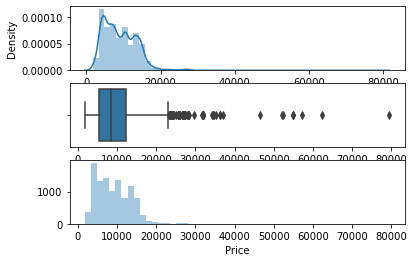

In [81]:
plotting(df1,'Price')

In [82]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



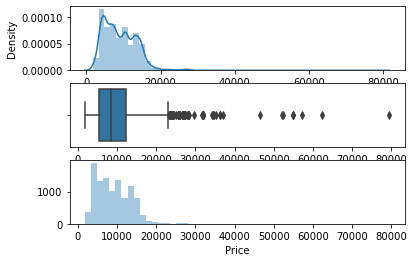

In [83]:
plotting(df1,'Price')

In [84]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,21,35,16,50,4,45,285,1,0,0,0,0


In [85]:
df1.drop(['Source','Duration'],axis=1,inplace=True)

In [86]:
df1['Price']=np.where(df1['Price']>=35000,df1['Price'].median(),df1['Price'])

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



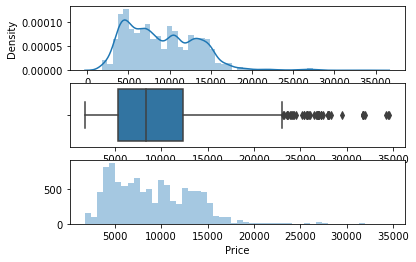

In [87]:
plotting(df1,'Price')

In [88]:
df1.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_day              int64
Journey_month            int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Duration_hr              int64
Duration_min             int64
Duration_totmin          int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
dtype: object

In [89]:
df1.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,5,1,13,15,5,50,7,25,445,0,1,0,0,0


In [99]:
cr=df1.corr()
cr

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
Airline,1.000000,0.275845,0.444589,0.612236,-0.030309,0.060664,0.072532,-0.108036,0.039221,-0.080076,0.482758,-0.166308,0.478981,-0.085612,-0.004620,0.201872,-0.232009,-0.081398
Destination,0.275845,1.000000,0.590943,0.386265,0.072013,0.041383,0.028430,-0.148661,-0.035173,-0.117637,0.434206,-0.095355,0.432619,-0.453645,0.010208,0.794821,-0.520841,-0.475534
Total_Stops,0.444589,0.590943,1.000000,0.633635,-0.024136,0.065495,0.038140,-0.106940,-0.061476,-0.002618,0.739916,-0.136706,0.738071,-0.368324,0.032761,0.490170,-0.234758,-0.260752
Price,0.612236,0.386265,0.633635,1.000000,-0.165545,0.025825,0.030389,-0.090662,0.006235,-0.033104,0.544661,-0.126571,0.542438,-0.142335,0.017079,0.291908,-0.187463,-0.241168
Journey_day,-0.030309,0.072013,-0.024136,-0.165545,1.000000,-0.264896,-0.002176,-0.021423,-0.002301,-0.016433,-0.037964,-0.007708,-0.038360,-0.059495,-0.068380,0.112092,0.012202,-0.013391
Journey_month,0.060664,0.041383,0.065495,0.025825,-0.264896,1.000000,-0.004329,-0.025786,0.028189,0.002136,0.055552,-0.018597,0.055136,-0.063092,0.063601,0.008017,-0.014993,-0.015696
Arrival_Time_hour,0.072532,0.028430,0.038140,0.030389,-0.002176,-0.004329,1.000000,-0.154363,0.005180,0.043122,0.055276,-0.118309,0.051531,-0.024419,0.054693,-0.006790,-0.014795,-0.033512
Arrival_Time_minute,-0.108036,-0.148661,-0.106940,-0.090662,-0.021423,-0.025786,-0.154363,1.000000,0.067911,-0.017597,-0.074450,0.151628,-0.069663,0.090993,0.118573,-0.209882,-0.030493,0.081196
Dep_Time_hour,0.039221,-0.035173,-0.061476,0.006235,-0.002301,0.028189,0.005180,0.067911,1.000000,-0.024745,0.002869,-0.023707,0.002088,-0.007887,0.155471,-0.118780,-0.014846,-0.017292
Dep_Time_minute,-0.080076,-0.117637,-0.002618,-0.033104,-0.016433,0.002136,0.043122,-0.017597,-0.024745,1.000000,-0.022104,0.092485,-0.019099,0.077354,-0.024238,-0.085534,0.067110,0.037705


<AxesSubplot:>

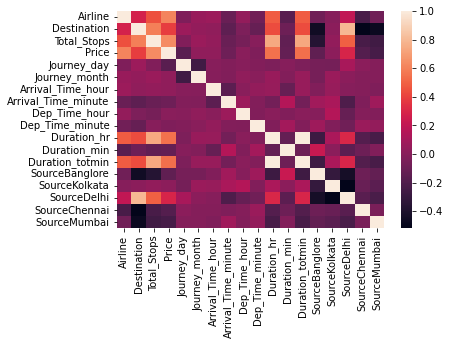

In [98]:
sns.heatmap(cr)

In [100]:
df1.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hr,Duration_min,Duration_totmin,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,1,10,22,20,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,5,1,13,15,5,50,7,25,445,0,1,0,0,0
2,10,4,2,13882.0,6,9,4,25,9,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218.0,5,12,23,30,18,5,5,25,325,0,1,0,0,0
4,3,2,1,13302.0,3,1,21,35,16,50,4,45,285,1,0,0,0,0


In [106]:
#selecting k best variables
from sklearn.feature_selection import mutual_info_regression 

In [102]:
X=df1.drop(['Price'],axis=1)


In [103]:
Y=df1['Price']

In [104]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Journey_day            int64
Journey_month          int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Duration_hr            int64
Duration_min           int64
Duration_totmin        int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

In [107]:
mutual_info_regression(X,Y)

array([0.97070084, 0.99715941, 0.79307917, 0.19526642, 0.24044732,
       0.39638916, 0.34219051, 0.34018321, 0.26303821, 0.46674801,
       0.34244199, 0.50054251, 0.39535625, 0.44870359, 0.5150189 ,
       0.11945802, 0.20170933])

In [112]:
imp=pd.DataFrame(mutual_info_regression(X,Y),index=X.columns)

In [118]:
imp.columns=['Importance_value']

In [119]:
imp.sort_values(by='Importance_value',ascending=False)

,Importance_value
Destination,1.001704
Airline,0.977738
Total_Stops,0.791264
SourceDelhi,0.524866
Duration_totmin,0.482770
Duration_hr,0.467763
SourceKolkata,0.457135
Arrival_Time_hour,0.391643
SourceBanglore,0.389904
Arrival_Time_minute,0.351601


In [121]:
price_sort=df1.corr()['Price']

In [131]:
price_sort.sort_values(ascending=False)

Price                  1.000000
Total_Stops            0.633635
Airline                0.612236
Duration_hr            0.544661
Duration_totmin        0.542438
Destination            0.386265
SourceDelhi            0.291908
Arrival_Time_hour      0.030389
Journey_month          0.025825
SourceKolkata          0.017079
Dep_Time_hour          0.006235
Dep_Time_minute       -0.033104
Arrival_Time_minute   -0.090662
Duration_min          -0.126571
SourceBanglore        -0.142335
Journey_day           -0.165545
SourceChennai         -0.187463
SourceMumbai          -0.241168
Name: Price, dtype: float64

In [132]:
# Random Forest model
from sklearn.model_selection import train_test_split

In [133]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
Rf=RandomForestRegressor()

In [138]:
model=Rf.fit(X_train,y_train)

In [139]:
y_pred=model.predict(X_test)

In [140]:
y_pred

array([16736.12,  6084.08,  8892.09, ...,  3478.68,  6269.59,  7352.05])

In [141]:
 !pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [142]:
import pickle

In [144]:
# procedure to save the ML model to pickel 
file=open(r'C:\Users\00423S744\Desktop\Geek\ML Certificate\Projects-AIrfare,NLP & Time series Forecasting\Airfare/rf_random.pkl','wb')

In [145]:
pickle.dump(model,file) # RF model('model') dumped inisde the the file

In [146]:
model=open(r'C:\Users\00423S744\Desktop\Geek\ML Certificate\Projects-AIrfare,NLP & Time series Forecasting\Airfare/rf_random.pkl','rb')

In [147]:
forest=pickle.load(model)

In [148]:
forest.predict(X_test)

array([16736.12,  6084.08,  8892.09, ...,  3478.68,  6269.59,  7352.05])

In [159]:
def mape(y_true,y_pred):

    y_true,y_pred=np.array(y_true),np.array(y_pred)

    return np.mean(np.abs((y_true-y_pred)/y_true))*100



In [160]:
mape(y_test,forest.predict(X_test))

13.265267700122077

In [180]:
def predict(ml_model):
    
    model=ml_model.fit(X_train, y_train)
    print('Training_score:{}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are:{}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE:{}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAE:', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE:{}', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score:0.9507661368761695
Predictions are:[16725.2   6183.57  8858.81 ...  3501.04  6346.52  7258.92]


r2_score: 0.8104250216225433
MSE:3690569.785634902
MAE: 1178.4405933326418
RMSE: 1921.0855747818475
MAPE:{} 13.234592848631904


C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



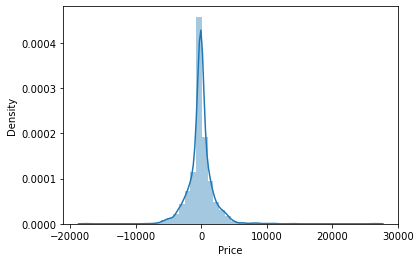

In [181]:
predict(RandomForestRegressor())

Training_score:0.5794483128817276
Predictions are:[12816.72571495  8820.27264273  8909.99897771 ...  4190.62345641
  9411.25977293  8261.70381625]


r2_score: 0.5557133671958718
MSE:8649194.304132728
MAE: 2061.784107595205
RMSE: 2940.9512583741894
MAPE:{} 24.948611058775487


C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



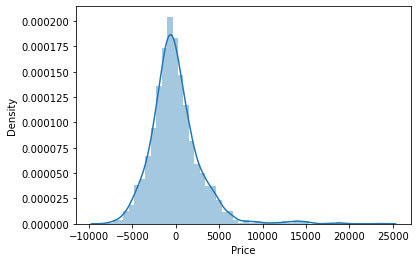

In [185]:
from sklearn.linear_model import LinearRegression

predict(LinearRegression())

Training_score:0.966591628243878
Predictions are:[16840.  5752.  9187. ...  3419.  5797.  6818.]


r2_score: 0.7350695643158732
MSE:5157559.661086568
MAE: 1317.4319231249222
RMSE: 2271.0261251439993
MAPE:{} 14.683292667530134


C:\Users\00423S744\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



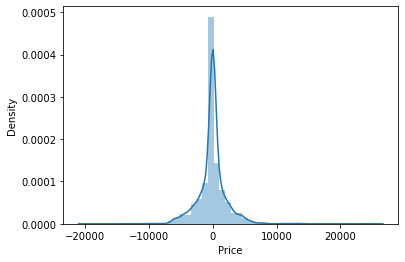

In [187]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

In [ ]:
from sklearn.model_selection import  Disc1={'p1': []}